<a href="https://colab.research.google.com/github/pedrotega/SyntheticDataGeneration-CTGAN/blob/main/data_generation_with_sdv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data generation tutorial with SDV

In this tutorial we are going to review some models to generate synthetic data 😉👌🏾 developed by the SDV porject. In the [**Synthetic Data Vault**](https://docs.sdv.dev/sdv/) project we can find demos in *Python* about data generation for tabular datasets using models like CTGAN, TVAE, CopulaGAN... as well as for time series using the PAR model.





> ⚠️ Warning: It is advisable to restart the running environment (CTRL + M .)



### Useful theoretical references:
* [Generative Adversarial Networks, Ian Goodfellow](https://dl.acm.org/doi/abs/10.1145/3422622)
* [Modeling Tabular Data using Conditional GAN, Lei Xu](https://arxiv.org/abs/1907.00503)

## 1. The first step is install the library of the SDV repository.

In [1]:
%pip install sdv

In [2]:
# If we want, we can avoid warning messages:
import warnings
warnings.filterwarnings("ignore")

# 2. Tabular data

### 2.1 To generate synthetic data we need some real data to work with, so let's get it.

We can import our own local dataset with the code of the following cell. In this case, a test dataset that describes the caracteristics of [53940 diamonds](https://www.kaggle.com/datasets/shivam2503/diamonds), however for the purpose of this tutorial we'll only use a 500 of them.

In [3]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
# Read the uploaded file into a DataFrame.
file_name = next(iter(uploaded))
real_data = pd.read_csv(file_name)  # Assuming it's a CSV file, change the function accordingly for other formats.

Saving diamonds_reduce.csv to diamonds_reduce (3).csv


Or we can use one of the demo dataset available in the SDV repository, like *student_placements* that content information of 215 students:

In [ ]:
from sdv.datasets.demo import download_demo

real_data, metadata = download_demo(
    modality = 'single_table',
    dataset_name = 'student_placements'
)
metadata.visualize()

In [4]:
tabula_data = real_data
real_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
495,0.71,Premium,D,SI1,62.7,60.0,2822,5.71,5.67,3.57
496,0.71,Premium,D,SI1,61.3,58.0,2822,5.75,5.73,3.52
497,0.70,Premium,D,SI1,60.2,60.0,2822,5.82,5.75,3.48
498,0.70,Ideal,D,SI1,60.7,56.0,2822,5.75,5.72,3.48


### [2.1.1] In case we upload our own data, we need to get the metadata from our dataset.

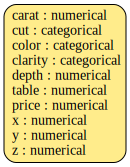

In [5]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)
metadata.visualize()

### 2.2 Now we are going bananas!!! 🍌 🍌 🍌 . Let's generate some data!

*   CTGAN

In [6]:
from sdv.single_table import CTGANSynthesizer

syn = CTGANSynthesizer(metadata)
syn.fit(real_data)
ctgan_data = syn.sample(num_rows=len(real_data))
ctgan_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.72,Very Good,E,VS2,62.6,60.3,2660,5.85,6.13,3.59
1,0.77,Good,E,VS1,65.0,54.9,2814,5.59,6.90,4.15
2,0.76,Fair,F,VS2,61.9,60.8,326,5.67,4.19,3.39
3,0.68,Ideal,F,SI1,62.8,55.6,2816,5.91,6.17,3.63
4,0.73,Good,F,VVS2,65.0,61.4,2822,5.86,5.92,3.65
...,...,...,...,...,...,...,...,...,...,...
495,0.70,Ideal,E,SI1,65.1,57.7,2658,5.83,6.05,2.90
496,0.65,Very Good,G,VS2,63.5,61.0,2695,5.41,4.18,3.73
497,0.76,Premium,E,SI1,64.6,54.8,2822,5.37,6.16,3.66
498,0.38,Ideal,D,SI1,68.1,63.2,326,5.66,6.05,3.79


* CopulaGAN

In [ ]:
from sdv.single_table import CopulaGANSynthesizer

syn = CopulaGANSynthesizer(metadata)
syn.fit(real_data)
copula_data = syn.sample(num_rows=len(real_data))
copula_data

* TVAE

In [ ]:
from sdv.single_table import TVAESynthesizer

syn = TVAESynthesizer(metadata)
syn.fit(real_data)
tvae_data = syn.sample(num_rows=len(real_data))
tvae_data

### 2.3 Conditional tabular data.

We can generate data conditioned to a variable in the dataset as our convenience. This is a pretty useful feature that can be use to generate more samples of anomalies and improve the training of a classifier for example.

In [15]:
from sdv.sampling import Condition

len_conditional_data = 10
our_conditions = Condition(
    num_rows=len_conditional_data,
    column_values={'cut': 'Ideal', 'color': 'E'}
)

'''suite_guests_without_rewards = Condition(
    num_rows=len_conditional_data,
    column_values={'room_type': 'SUITE'}
)'''

synthetic_data = syn.sample_from_conditions(
    conditions=[our_conditions]
)

synthetic_data

Sampling conditions: 100%|██████████| 10/10 [00:00<00:00, 29.02it/s]


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.74,Ideal,E,VVS2,63.3,55.2,2759,5.70,5.80,3.60
1,0.73,Ideal,E,SI2,64.3,60.6,326,5.98,6.16,3.69
2,0.74,Ideal,E,SI1,67.2,60.3,2676,5.44,6.61,3.57
3,0.64,Ideal,E,VVS1,64.6,54.1,2709,6.11,5.85,3.61
4,0.71,Ideal,E,SI1,63.4,60.7,326,5.53,6.05,3.73
5,0.73,Ideal,E,SI2,63.4,54.4,2650,4.70,5.54,2.87
6,0.90,Ideal,E,VVS1,65.5,62.7,2629,5.97,6.04,3.73
7,0.20,Ideal,E,VVS2,65.1,56.3,2745,5.51,4.13,3.65
8,0.71,Ideal,E,SI2,64.3,52.6,2622,5.87,5.62,3.68
9,0.68,Ideal,E,SI2,65.3,56.4,2698,5.69,5.97,3.47


# 3. Time series data

### 3.1 In this case we need to import a dataset with some timeseries to work with.

As in the case of tabular data, we can upload our own dataset or use a demo dataset from the SDV repository. In this case, we can upload a demo dataset that describes the [weather of a city](https://www.kaggle.com/datasets/muthuj7/weather-dataset?select=weatherHistory.csv) for a couple of days.

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
# Read the uploaded file into a DataFrame.
file_name = next(iter(uploaded))
real_data = pd.read_csv(file_name)  # Assuming it's a CSV file, change the function accordingly for other formats.

Saving weatherHistory_reduce.csv to weatherHistory_reduce (2).csv


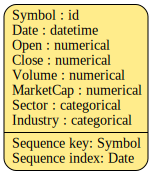

In [17]:
from sdv.datasets.demo import download_demo

real_data, metadata = download_demo(
    modality = 'sequential',
    dataset_name = 'nasdaq100_2019'
)
metadata.visualize()

In [ ]:
ts_data = real_data
real_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-10 00:00:00.000 +0200,Partly Cloudy,rain,10.422222,10.422222,0.62,16.9855,150.0,15.8263,0.0,1014.40,Mostly cloudy throughout the day.
1,2006-04-10 01:00:00.000 +0200,Partly Cloudy,rain,9.911111,7.566667,0.66,17.2109,149.0,15.8263,0.0,1014.20,Mostly cloudy throughout the day.
2,2006-04-10 02:00:00.000 +0200,Mostly Cloudy,rain,11.183333,11.183333,0.80,10.8192,163.0,14.9569,0.0,1008.71,Mostly cloudy throughout the day.
3,2006-04-10 03:00:00.000 +0200,Partly Cloudy,rain,7.155556,5.044444,0.79,11.0768,180.0,15.8263,0.0,1014.47,Mostly cloudy throughout the day.
4,2006-04-10 04:00:00.000 +0200,Partly Cloudy,rain,6.111111,4.816667,0.82,6.6493,161.0,15.8263,0.0,1014.45,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
235,2006-04-19 19:00:00.000 +0200,Overcast,rain,13.166667,13.166667,0.93,3.7674,335.0,5.2164,0.0,1011.07,Mostly cloudy until night.
236,2006-04-19 20:00:00.000 +0200,Overcast,rain,13.255556,13.255556,0.93,3.1395,228.0,8.0500,0.0,1011.23,Mostly cloudy until night.
237,2006-04-19 21:00:00.000 +0200,Overcast,rain,13.011111,13.011111,0.93,10.3362,274.0,9.9820,0.0,1011.35,Mostly cloudy until night.
238,2006-04-19 22:00:00.000 +0200,Mostly Cloudy,rain,12.455556,12.455556,0.91,5.7960,310.0,14.9086,0.0,1011.67,Mostly cloudy until night.


### [3.1.1] In case we upload our own data, we need to get the metadata from our dataset and do another **KEY** ( ;) ) step.

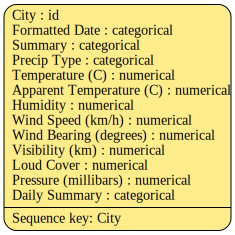

In [ ]:
from sdv.metadata import SingleTableMetadata

# Add a column to be defined as the sequence key to distiguish among the
# timeseries. In our case we only have one time series but the definition
# of a sequence key is mandatory.
new_column = pd.Series(['Not Vigo :,(']*len(real_data))
real_data.insert(0, 'City', new_column)

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)

metadata.update_column(column_name='City', sdtype='id')
metadata.set_sequence_key(column_name='City')
metadata.visualize()

### 3.2 Now we are going MORE bananas!!! 🍌 🍌 🍌 🍌 🍌 🍌 WITH TIME-SERIES. Let's generate some data!

In [38]:
from sdv.sequential import PARSynthesizer

syn = PARSynthesizer(epochs=300, metadata=metadata, verbose=True)
syn.fit(real_data)

par_data = syn.sample(num_sequences=2)
par_data

Epoch 300 | Loss -0.9802337884902954: 100%|██████████| 300/300 [12:41<00:00,  2.54s/it]
100%|██████████| 2/2 [00:04<00:00,  2.30s/it]


,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,AAAA,2019-01-03,344.513341,436.063985,5168126,5.975864e+10,Public Utilities,Television Services
1,AAAA,2019-01-02,405.130179,397.345626,1041745,1.087659e+11,Technology,Business Services
2,AAAA,2019-01-04,364.786158,368.009585,6027604,NaN,NaN,Semiconductors
3,AAAA,2019-01-05,382.524455,432.695884,840644,NaN,Technology,NaN
4,AAAA,2019-01-05,393.577199,384.059986,10000,8.954762e+10,Technology,Other Specialty Stores
...,...,...,...,...,...,...,...,...
409,AAAB,2019-11-28,5.290000,5.270000,7871506,NaN,Capital Goods,RETAIL: Building Materials
410,AAAB,2019-11-30,183.437196,5.270000,6855419,5.893961e+09,Consumer Non-Durables,Television Services
411,AAAB,2019-12-01,183.437196,5.270000,6569659,5.893961e+09,Capital Goods,Television Services
412,AAAB,2019-12-03,5.290000,5.270000,2871586,NaN,Health Care,Biotechnology: Commercial Physical & Biologica...


### 3.3 Conditional Time series data

We can generate data conditioned to a variable in the dataset as our convenience. This is a pretty useful feature that can be use to generate more samples of anomalies and improve the training of a classifier for example.

In [19]:
from sdv.datasets.demo import download_demo
from sdv.sequential import PARSynthesizer
import pandas as pd

real_data, metadata = download_demo(
    modality = 'sequential',
    dataset_name = 'nasdaq100_2019'
)

syn = PARSynthesizer(
    metadata,
    epochs=50,
    context_columns=['Sector', 'Industry'],
    verbose=True)
syn.fit(real_data)

Epoch 50 | Loss 1.71583890914917: 100%|██████████| 50/50 [01:29<00:00,  1.79s/it]


In [20]:
scenario_context = pd.DataFrame(data={
    'Symbol': ['COMPANY-A', 'COMPANY-B', 'COMPANY-C', 'COMPANY-D', 'COMPANY-E'],
    'Sector': ['Technology']*2 + ['Consumer Services']*3,
    'Industry': ['Computer Manufacturing', 'Computer Software: Prepackaged Software',
                 'Hotels/Resorts', 'Restaurants', 'Clothing/Shoe/Accessory Stores']
})

syn.sample_sequential_columns(
    context_columns=scenario_context,
    sequence_length=2
)

100%|██████████| 5/5 [00:00<00:00, 77.80it/s]


,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,COMPANY-A,2018-12-29,39.899173,5.270000,6569659,NaN,Technology,Computer Manufacturing
1,COMPANY-A,2019-01-01,212.623202,238.681228,6569659,5.893961e+09,Technology,Computer Manufacturing
2,COMPANY-B,2019-01-10,183.437196,183.531971,10000,1.743496e+11,Technology,Computer Software: Prepackaged Software
3,COMPANY-B,2019-01-03,183.437196,118.158848,5937824,NaN,Technology,Computer Software: Prepackaged Software
4,COMPANY-C,2019-01-01,387.210836,604.368234,3977421,5.893961e+09,Consumer Services,Hotels/Resorts
5,COMPANY-C,2019-01-05,523.366722,331.390921,6569659,5.110207e+10,Consumer Services,Hotels/Resorts
6,COMPANY-D,2018-12-26,183.437196,262.800063,1561929,7.773912e+10,Consumer Services,Restaurants
7,COMPANY-D,2018-12-31,183.437196,143.816411,6569659,NaN,Consumer Services,Restaurants
8,COMPANY-E,2018-12-28,183.437196,126.706054,6569659,1.276190e+11,Consumer Services,Clothing/Shoe/Accessory Stores
9,COMPANY-E,2019-01-05,183.437196,263.296405,6569659,2.338152e+11,Consumer Services,Clothing/Shoe/Accessory Stores


# 4. Store and load models

The training of the generation algorithm can take a big amount of time. Due to this factor is useful store the training algorithm and use it later.

In [ ]:
syn.save('model.pkl')

In [ ]:
syn = CTGANSynthesizer.load('model.pkl')

In [ ]:
syn = CopulaGANSynthesizer.load('model.pkl')

In [ ]:
syn = TVAESynthesizer.load('model.pkl')

In [ ]:
syn = PARSynthesizer.load('model.pkl')

# 5. Synthetic data evaluation.

In this example we are going to use a general evaluation to assess the synthetic data generated. If you want to know more abour the insights or other evalualion methods, you can check this links: [Single table evaluation](https://docs.sdv.dev/sdv/single-table-data/evaluation) and [SDMetrics library](https://docs.sdv.dev/sdmetrics/)

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    ts_data,#tabular_data
    par_data,#ctgan_data,...
    metadata
)

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen 

Generating report ...
(2/2) Evaluating Column Pair Trends: :  17%|█▋        | 13/78 [00:00<00:00, 129.32it/s]

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


(2/2) Evaluating Column Pair Trends: : 100%|██████████| 78/78 [00:01<00:00, 42.05it/s]

Overall Quality Score: 79.09%

Properties:
- Column Shapes: 85.3%
- Column Pair Trends: 72.89%
